In [1]:
!pip install scikeras==0.12.0

In [2]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [4]:
!pip install keras-tuner
import pandas as pd
import seaborn as sns
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt
import math
import calendar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from matplotlib.pylab import rcParams
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
import keras_tuner
from keras.layers import LSTM, Dropout, Dense
from scipy.stats import randint, uniform
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Metodos Para Calcular o Theils U Coefficient
def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def theil_u2(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    N = len(y_true)

    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)

    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))

    theilU2 = numerator / denominator

    return theilU2

Adiciona caminho do dataset

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Projeto Internações/Preparação dos dados/dataset_internacoes_completo.csv')

In [ ]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0
2,48,2010-01-01,AC,BRASILÉIA,22325.0
3,2,2010-01-01,AC,BUJARI,8838.0
4,4,2010-01-01,AC,CAPIXABA,9179.0
...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0


In [ ]:
dataset['populacao'].dtype

dtype('float64')

In [ ]:
def porte(populacao):
  if populacao <= 20000:
    return 'Pequeno Porte I'
  elif populacao >= 20001 and populacao <= 50000 :
    return 'Pequeno Porte II'
  elif populacao >= 50001 and populacao <= 100000:
    return 'Médio Porte'
  elif populacao >= 100001 and populacao <= 900000:
    return 'Grande Porte'
  elif populacao >= 900001:
    return 'Metrópole'

In [ ]:
def taxa_internacao (row):
  return row['Qtd. internacoes']*1000/row['populacao']

In [ ]:
dataset['taxa_internacao'] = dataset.apply(taxa_internacao, axis =1)

In [ ]:
dataset['Porte'] = dataset['populacao'].apply(porte)

In [ ]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0,1.070255,Pequeno Porte I
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0,1.104972,Pequeno Porte I
2,48,2010-01-01,AC,BRASILÉIA,22325.0,2.150056,Pequeno Porte II
3,2,2010-01-01,AC,BUJARI,8838.0,0.226296,Pequeno Porte I
4,4,2010-01-01,AC,CAPIXABA,9179.0,0.435777,Pequeno Porte I
...,...,...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0,1.212016,Pequeno Porte II
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0,0.621891,Pequeno Porte I
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0,0.466853,Pequeno Porte I
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0,1.069900,Pequeno Porte I


Filtro

In [ ]:
dataset = dataset[dataset['Porte'] == 'Médio Porte']

In [ ]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
5,249,2010-01-01,AC,CRUZEIRO DO SUL,81907.0,3.040033,Médio Porte
36,54,2010-01-01,AL,CAMPO ALEGRE,52041.0,1.037643,Médio Porte
45,55,2010-01-01,AL,CORURIPE,53387.0,1.030213,Médio Porte
88,64,2010-01-01,AL,PALMEIRA DOS ÍNDIOS,72064.0,0.888099,Médio Porte
94,138,2010-01-01,AL,PENEDO,61834.0,2.231782,Médio Porte
...,...,...,...,...,...,...,...
1024719,133,2024-04-01,SP,UBATUBA,80781.0,1.646427,Médio Porte
1024734,59,2024-04-01,SP,VINHEDO,65209.0,0.904783,Médio Porte
1024739,69,2024-04-01,SP,VOTUPORANGA,86820.0,0.794748,Médio Porte
1024799,75,2024-04-01,TO,GURUPI,78394.0,0.956706,Médio Porte


In [ ]:
time_series = dataset[['Data completa', 'taxa_internacao']]
time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])

<ipython-input-17-8980fe5bf9f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])


In [ ]:
time_series = time_series.set_index('Data completa').resample('M').mean()

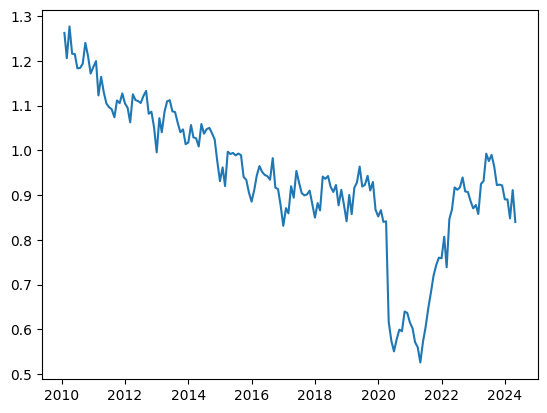

In [ ]:
plt.plot(time_series)

In [ ]:
time_series = time_series['2010-01-01':'2019-12-31']

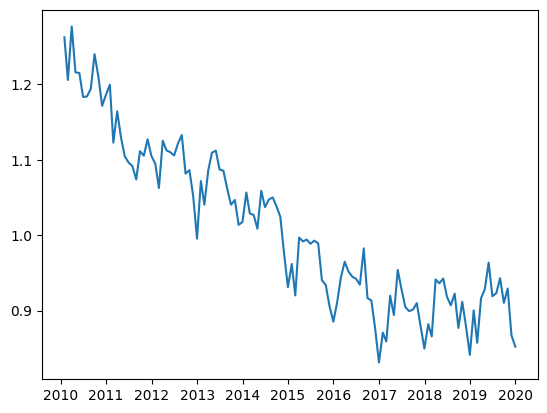

In [ ]:
plt.plot(time_series)

In [ ]:
time_series

,taxa_internacao
Data completa,
2010-01-31,1.262302
2010-02-28,1.205797
2010-03-31,1.276683
2010-04-30,1.215884
2010-05-31,1.215052
...,...
2019-08-31,0.943013
2019-09-30,0.910317
2019-10-31,0.929289


In [ ]:
train_data= time_series.values

#Normaliza os Dados
normalizer = MinMaxScaler(feature_range=(0,1))
train_data = normalizer.fit_transform(train_data)

#Cria os Arrays No Formato Certo
x = []
y = []
for i in range(12, len(train_data)):
  x.append(train_data[i-12:i, 0])
  y.append(train_data[i,0])
x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1],1))

#Converte os Dados Para Float
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')


In [ ]:
len(x)

108

In [ ]:
x_train, y_train = x[:84], y[:84]
x_test, y_test = x[84:96], y[84:96]
x_val, y_val = x[96:], y[96:]



In [ ]:
dropout_val = 0.2

def build_model(hp):
    neurons_first_layer = hp.Choice('neurons_first_layer', [800])
    neurons_second_layer = hp.Choice('neurons_second_layer', [300])
    neurons_third_layer = hp.Choice('neurons_third_layer', [100])
    neurons_fourth_layer = hp.Choice('neurons_fourth_layer', [200])
    dropout_val = hp.Choice('dropout_val', [0.2])

    regressor = Sequential()
    regressor.add(LSTM(units=neurons_first_layer, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    regressor.add(Dropout(dropout_val))

    if neurons_second_layer:
        regressor.add(LSTM(units=neurons_second_layer, return_sequences=True))
        regressor.add(Dropout(dropout_val))

    if neurons_third_layer:
        regressor.add(LSTM(units=neurons_third_layer, return_sequences=True))
        regressor.add(Dropout(dropout_val))

    if neurons_fourth_layer:
        regressor.add(LSTM(units=neurons_fourth_layer))
        regressor.add(Dropout(dropout_val))

    regressor.add(Dense(units=1, activation='linear'))

    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    return regressor


In [ ]:
import shutil

# Remove the directory containing the previous tuning results
shutil.rmtree('my_dir')


FileNotFoundError: [Errno 2] No such file or directory: 'my_dir'

In [ ]:
# Configurando o tuner para realizar uma busca em grade
tuner = kt.GridSearch(
    hypermodel=build_model,
    objective=kt.Objective("val_mean_squared_error", direction="min"),
    directory="my_dir",
    project_name="otimizacao_keras_tuner"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
tuner.search(x_train, y_train, batch_size = 16, epochs=100, validation_data=(x_val, y_val))

Trial 1 Complete [00h 04m 58s]
val_mean_squared_error: 0.004702155943959951

Best val_mean_squared_error So Far: 0.004702155943959951
Total elapsed time: 00h 04m 58s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 800)             │       2,566,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 800)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 300)             │       1,321,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 300)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 12, 100)             │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,001 (16.36 MB)

 Trainable params: 4,289,001 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinando o melhor modelo com o conjunto de treinamento
history = best_model.fit(x_train, y_train, batch_size = 16, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 457ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0087 - v

Separando dados de validação

In [ ]:
y_test = y_test.reshape(-1, 1)
train_predictions = best_model.predict(x_test)
train_predictions = normalizer.inverse_transform(train_predictions)
y_test = normalizer.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


In [ ]:
y_val = y_val.reshape(-1, 1)
val_predictions = best_model.predict(x_val)
val_predictions = normalizer.inverse_transform(val_predictions)
y_val = normalizer.inverse_transform(y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [ ]:
train_results = pd.DataFrame(zip(train_predictions, y_test), columns = ['previsao', 'valor_real'])
train_results['previsao'] = train_results['previsao'].apply(lambda x: x[0])
train_results['valor_real'] = train_results['valor_real'].apply(lambda x: x[0])

In [ ]:
train_results_val = pd.DataFrame(zip(val_predictions, y_val), columns = ['previsao', 'valor_real'])
train_results_val['previsao'] = train_results_val['previsao'].apply(lambda x: x[0])
train_results_val['valor_real'] = train_results_val['valor_real'].apply(lambda x: x[0])

In [ ]:
start_date = "2018-01-31"
train_results['data'] = pd.date_range(start=start_date, periods=len(train_results), freq='M')
train_results.set_index('data', inplace=True)

In [ ]:
train_results

,previsao,valor_real
data,,
2018-01-31,0.868516,0.882100
2018-02-28,0.877737,0.865775
2018-03-31,0.898747,0.941294
2018-04-30,0.903408,0.936155
2018-05-31,0.916644,0.942611
2018-06-30,0.908785,0.918340
2018-07-31,0.904073,0.907032
2018-08-31,0.901307,0.922505
2018-09-30,0.894842,0.877068


In [ ]:
start_date = "2019-01-31"
train_results_val['data'] = pd.date_range(start=start_date, periods=len(train_results_val), freq='M')
train_results_val.set_index('data', inplace=True)

In [ ]:
train_results_val

,previsao,valor_real
data,,
2019-01-31,0.874123,0.900318
2019-02-28,0.887781,0.857349
2019-03-31,0.912735,0.916452
2019-04-30,0.912871,0.928450
2019-05-31,0.912887,0.963617
2019-06-30,0.908366,0.919100
2019-07-31,0.907266,0.922979
2019-08-31,0.904406,0.943013
2019-09-30,0.891135,0.910317


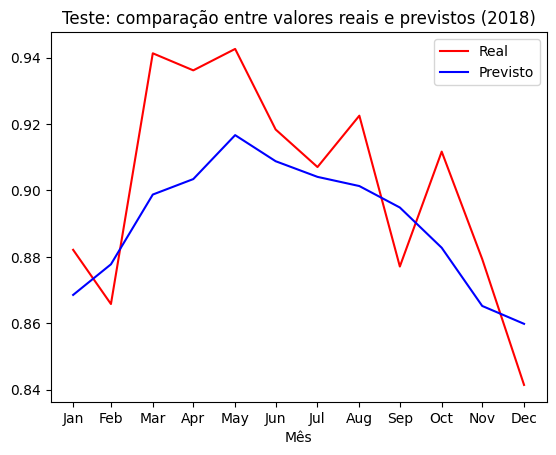

In [ ]:
plt.plot(train_results['valor_real'], color='red', label = 'Real')
plt.plot(train_results['previsao'], color='blue', label = 'Previsto')
# Formatando o eixo x para mostrar apenas o mês
plt.xticks(ticks=train_results.index, labels=train_results.index.strftime('%b'))

plt.title('Teste: comparação entre valores reais e previstos (2018)')
plt.xlabel('Mês')
plt.legend()
plt.show()

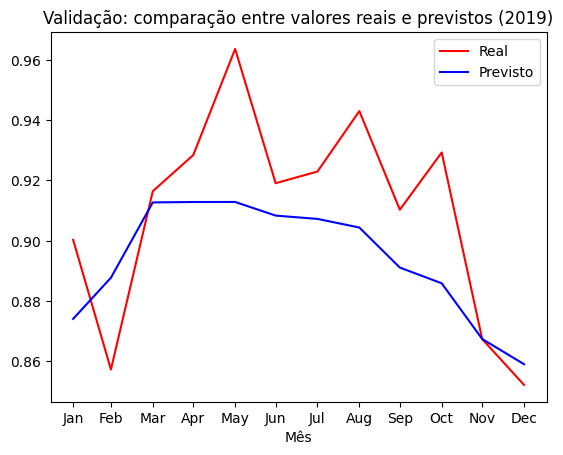

In [ ]:
plt.plot(train_results_val['valor_real'], color='red', label = 'Real')
plt.plot(train_results_val['previsao'], color='blue', label = 'Previsto')
# Formatando o eixo x para mostrar apenas o mês
plt.xticks(ticks=train_results_val.index, labels=train_results_val.index.strftime('%b'))
# Adicionando um título ao gráfico
plt.title('Validação: comparação entre valores reais e previstos (2019)')
plt.xlabel('Mês')
plt.legend()
plt.show()

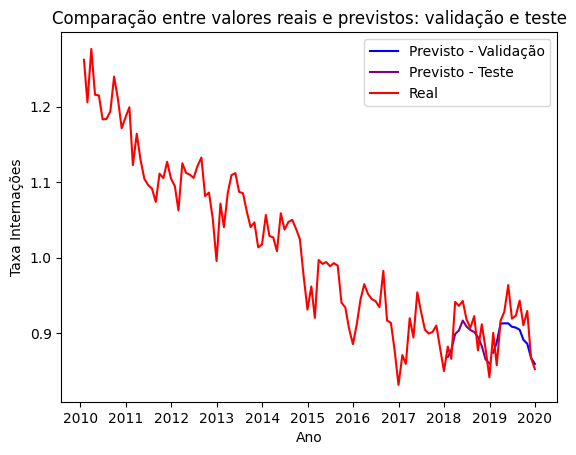

In [ ]:
plt.plot(train_results_val['previsao'], color='blue', label = 'Previsto - Validação')
plt.plot(train_results['previsao'], color='purple', label = 'Previsto - Teste')
plt.plot(time_series, color='red', label = 'Real')

plt.title('Comparação entre valores reais e previstos: validação e teste')
plt.ylabel('Taxa Internações')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(train_results['valor_real'], train_results['previsao'])

In [ ]:
mse

0.00051054836

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

0.022595318

In [ ]:
mean_absolute_percentage_error(train_results['valor_real'], train_results['previsao'])

0.021962978

In [ ]:
tu = theil_u2(train_results['valor_real'], train_results['previsao'])

In [ ]:
tu

0.674077139622284

In [ ]:
mse_val = mean_squared_error(train_results_val['valor_real'], train_results_val['previsao'])

In [ ]:
mse_val

0.0007158614